In [2]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
len(messages)

5574

In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
messages[0]

#spacing indicates that this is a tab separated values file (TSV).
#First column is label whether message is ham or spam, second column is
#the message itself.

#\t indicates tab separation

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                      names = ['label','message'])

#we can use read_csv, the sep argument, and the names argument to make
#the dataset into an easily readable dataframe.

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
#note that there are fewer unique messages than there are messages,
#indicating there are repeat messages. These could be either common 
#texts ('yes','ok',etc.) or repeated spam. Also note that "sorry, I'll 
#call later" is the most common message, with 30 occurrences.

#we can use groupby to use the describe method by the actual label.

In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
#We will now start feature engineering to better predict whether 
#a message is ham or spam. This is largely dependent on your domain
#knowledge

In [15]:
messages['length'] = messages['message'].apply(len)

In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

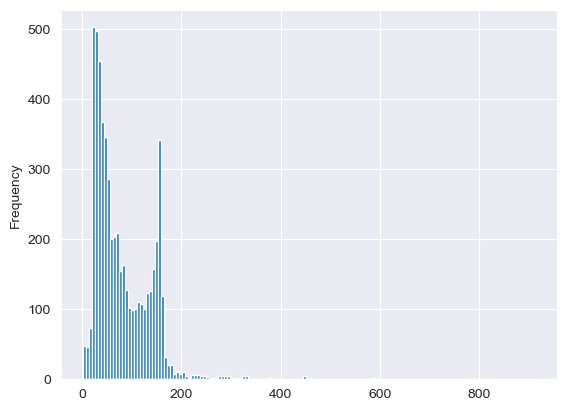

In [18]:
sns.set_style('darkgrid')
messages['length'].plot.hist(bins=150)

In [19]:
#appears to be some bimodal behavior where messages are either very 
#short or long

In [20]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [21]:
messages[messages['length']==910]['message'].iloc[0]

#calling just the first half before ['message'] gives a one-index df
#result, calling ['message'] gives the abbreviated object, and calling
#.iloc[0] gives the entire content of the message.

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [22]:
#we now want to see if message length substantially distinguishes ham
#from spam

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

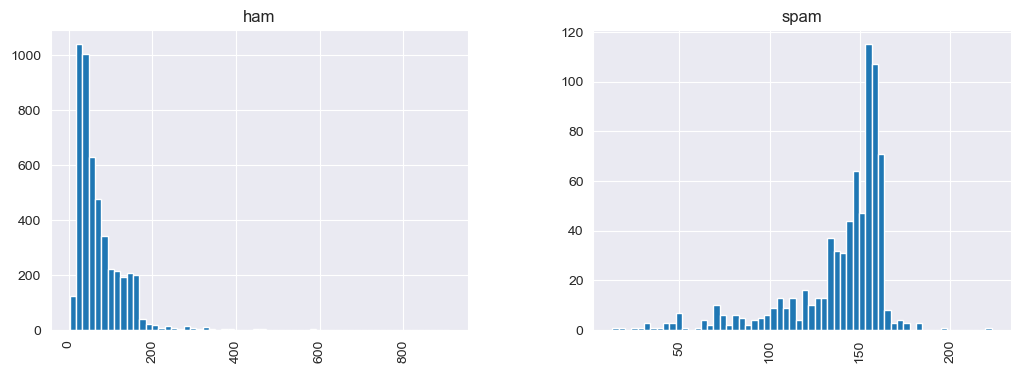

In [23]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

<AxesSubplot:xlabel='length', ylabel='Count'>

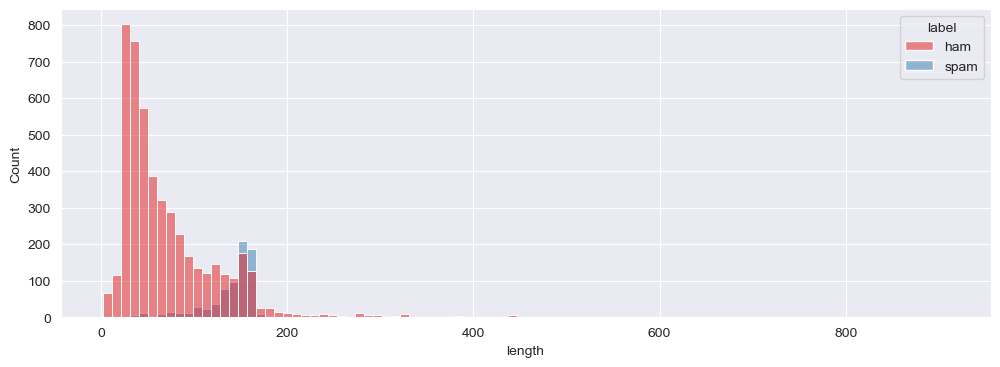

In [24]:
plt.figure(figsize=(12,4))
sns.histplot(data=messages,x='length',hue='label',palette='Set1')

In [25]:
#spam messages tend to have more characters

In [26]:
#this dataset is unique because it is largely presented in strings
#whereas the classification algorithms we've already covered need
#a numerical feature. This will be accomplished by converting raw 
#messages into vectors using a bag of words

In [27]:
import string

In [28]:
mess = 'Sample message! Notice: it has punctuation.'

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
nopunc = [c for c in mess if c not in string.punctuation]

In [31]:
nopunc

#the punctuation has been removed

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [32]:
from nltk.corpus import stopwords

In [33]:
stopwords.words('english')

#these words are so common that they are not helpful in distinguishing
#text data sources from each other

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
nopunc = ''.join(nopunc)

In [35]:
nopunc

'Sample message Notice it has punctuation'

In [36]:
x = ['a','b','c','d']

In [37]:
x

['a', 'b', 'c', 'd']

In [38]:
''.join(x)

'abcd'

In [39]:
'!'.join(x)

'a!b!c!d'

In [40]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [41]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [43]:
#'it' and 'has' were removed

In [44]:
def text_process(mess):
    """
    1.remove punc
    2.remove stop words
    3.return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
#tokenization will convert a normal text string into a list of tokens

In [47]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [48]:
#nltk library has a lot of other tools for text data normalization

#for example, stemming will take 'running','ran', and 'run', and return
#run, but it struggles with shorthand

#note that shorthand is very prevalent here ('nah','dun')

In [49]:
#vectorization: messages are now lists of tokens that need to be 
#converted to vectors

In [50]:
#term frequency (TF): how many times a word occurs in each message
#inverse document frequency (IDF): weigh the counts so frequent tokens get
        #lower weights
#L2 norm: normalize the vectors to the unit length to abstract from
        #the original text

In [51]:
#CountVectorizer will create a large 2d matrix where the columns rep
#each message in the dataset and the rows represent the number of times
#each word in the entire corpus appears (bag of words)

#the output will be formatted as a sparse matrix because a high number
#of cells will be 0.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

#analyzer is set to the function we already created to avoid using all
#the parameters available. It is then fit to the text data

In [54]:
print(len(bow_transformer.vocabulary_))

#shows the total number of vocab words

11425


In [55]:
mess4 = messages['message'][3]

In [56]:
mess4

'U dun say so early hor... U c already then say...'

In [57]:
bow4 = bow_transformer.transform([mess4])

In [58]:
print(bow4)

#shows that there are 7 unique words in message 4 after removing
#the common stopwords

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [59]:
print(bow4.shape)

(1, 11425)


In [60]:
bow_transformer.get_feature_names()[4068]

#finding which letters are represented by a certain index

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'U'

In [61]:
bow_transformer.get_feature_names()[9554]


'say'

In [62]:
messages_bow = bow_transformer.transform(messages['message'])

In [63]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

#5572 messages, 11425 unique words

Shape of Sparse Matrix:  (5572, 11425)


In [64]:
messages_bow.nnz

#number of non-zero occurrences

50548

In [65]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

#compares non-zero messages to total number of messages

sparsity: 0.07940295412668218


In [66]:
from sklearn.feature_extraction.text import TfidfTransformer

In [67]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [68]:
tfidf4 = tfidf_transformer.transform(bow4)

In [69]:
print(tfidf4)

#this gives an inverse document frequency and term frequency relationship
#for this particular message.

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [70]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

#checking the document frequency of 'university'

8.527076498901426

In [73]:
#converting the entire bag of words corpus into a tfidf corpus

messages_tfidf = tfidf_transformer.transform(messages_bow)
#messages are now represented as numerical vectors so we can now train
#the spam/ham classifier

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [77]:
spam_detect_model.predict(tfidf4)[0]

#the model detects that tfidf4 is ham

'ham'

In [78]:
messages['label'][3]

'ham'

In [79]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [80]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [81]:
#note that we are evaluating off data that we trained on, which should
#not be done

In [82]:
from sklearn.model_selection import train_test_split

In [85]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],
                messages['label'],test_size=0.3)

In [86]:
msg_train

5173                                                 U 2.
2184    Chinatown got porridge, claypot rice, yam cake...
2699                             FROM 88066 LOST £12 HELP
1984    I wnt to buy a BMW car urgently..its vry urgen...
2952                     Hey now am free you can call me.
                              ...                        
752     You have an important customer service announc...
1341                              Might ax well im there.
1216    that would be good … I'll phone you tomo lunch...
5051          I will vote for wherever my heart guides me
2767    Married local women looking for discreet actio...
Name: message, Length: 3900, dtype: object

In [87]:
#normally you would have to run all this data through the same process
#used initially to clean it, but sklearn has a data pipeline feature

In [89]:
from sklearn.pipeline import Pipeline

In [91]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [92]:
#we can now pass message text data and the pipeline will do all the 
#preprocessing

#pipeline can now be treated as a normal estimator

In [93]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fa1f924b040>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [94]:
predictions = pipeline.predict(msg_test)

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1443
        spam       1.00      0.65      0.79       229

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



In [97]:
print(confusion_matrix(label_test,predictions))

[[1443    0]
 [  80  149]]


In [98]:
#you could use any classifier you wish

from sklearn.ensemble import RandomForestClassifier

In [99]:
pipeline2 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [101]:
pipeline2.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fa1f924b040>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [102]:
predictions2 = pipeline2.predict(msg_test)

In [103]:
print(classification_report(label_test,predictions2))
print('\n')
print(confusion_matrix(label_test,predictions2))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1443
        spam       0.99      0.72      0.84       229

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



[[1442    1]
 [  63  166]]
